In [1]:
import perceval as pcvl
import perceval.components as comp
import numpy as np
import matplotlib.pyplot as plt

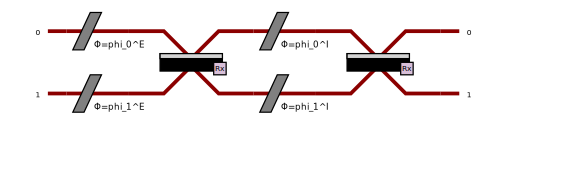

In [2]:
'''
chip = pcvl.Circuit(m=2)
chip.add(0, comp.PS(phi = pcvl.Parameter('phi_0^E')))
chip.add(1, comp.PS(phi = pcvl.Parameter('phi_1^E')))
chip.add((0,1),comp.BS())
chip.add(0, comp.PS(phi = pcvl.Parameter('phi_0^I')))
chip.add(1, comp.PS(phi = pcvl.Parameter('phi_1^I')))
chip.add((0,1),comp.BS())
pcvl.pdisplay(chip, recursive=True)

In [3]:
chip.compute_unitary(use_symbolic=True)

Matrix([
[    exp(I*phi_0^E)*exp(I*phi_0^I)/2 - exp(I*phi_0^E)*exp(I*phi_1^I)/2, I*exp(I*phi_0^I)*exp(I*phi_1^E)/2 + I*exp(I*phi_1^E)*exp(I*phi_1^I)/2],
[I*exp(I*phi_0^E)*exp(I*phi_0^I)/2 + I*exp(I*phi_0^E)*exp(I*phi_1^I)/2,    -exp(I*phi_0^I)*exp(I*phi_1^E)/2 + exp(I*phi_1^E)*exp(I*phi_1^I)/2]])

In [4]:
'''Set input state:'''
input_state = pcvl.BasicState([1,0])

'''Set phase shifter parameters:'''
for i in range(2):
    chip.get_parameters()[2*i].set_value(np.pi/2)
    chip.get_parameters()[2*i+1].set_value(0)

In [5]:
'''Processor initialization and probability sampling:'''
p = pcvl.Processor("Naive", chip)
p.with_input(input_state)

sampler = pcvl.algorithm.Sampler(p)
probs = sampler.probs()

'''Display sampling probability:'''
pcvl.pdisplay(probs['results'])

In [6]:
'''Set finite number of single photon shot:'''
n_shot = 100

'''Processor initialization and probability sampling:'''
p = pcvl.Processor("Naive", chip)
p.with_input(input_state)

sampler = pcvl.algorithm.Sampler(p)
count = sampler.sample_count(n_shot)

'''Display sampling counting:'''
output_state1 = pcvl.BasicState([0,1])
output_state2 = pcvl.BasicState([1,0])
count['results'][output_state1], count['results'][output_state2]

(45, 55)

In [7]:
'''Set parameters:'''
input_state = pcvl.BasicState([1,0])
output_state = pcvl.BasicState([0,1])
I = 200
n_shot=50
theta_vec = np.linspace(-2, 6*np.pi+2, I)
out_prob = np.ones(I)
out_count = np.ones(I)

'''Sampling output probabililities and counts:'''
for i in range(I):
    chip.get_parameters()[2].set_value(theta_vec[i])
    
    p = pcvl.Processor("Naive", chip)
    p.with_input(input_state)
    sampler = pcvl.algorithm.Sampler(p)
    
    prob = sampler.probs()
    out_prob[i] = prob['results'][output_state]
    
    count = sampler.sample_count(n_shot)
    out_count[i] = count['results'][output_state]

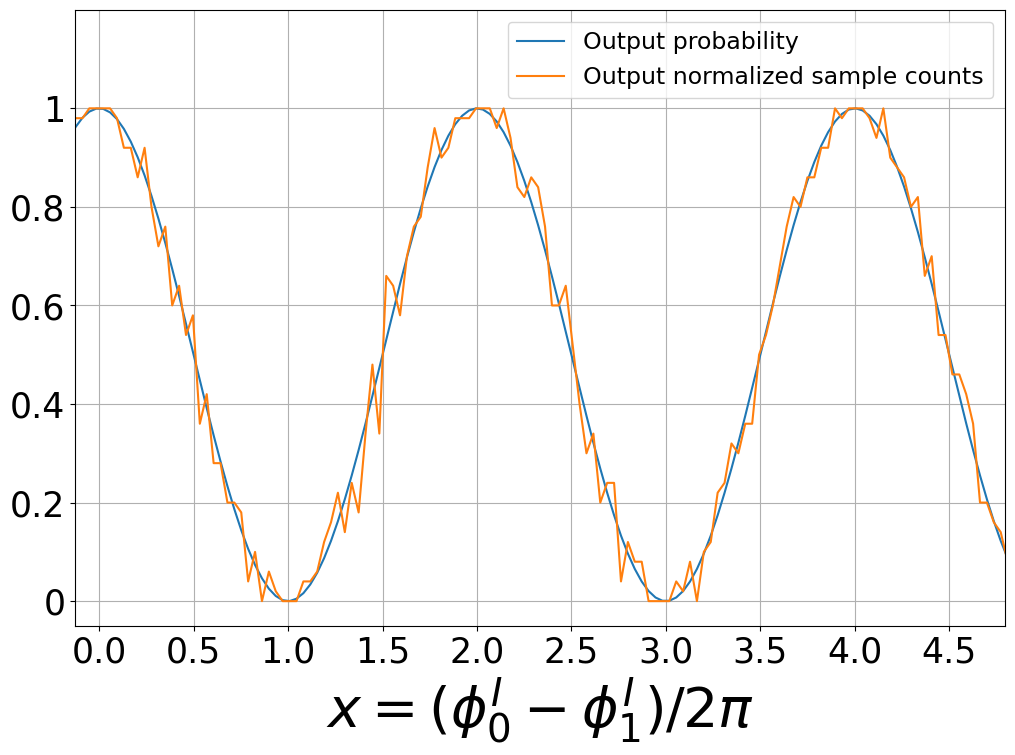

In [8]:
'''Plot output probabilities and normalized samples counts:'''
fig, ax = plt.subplots(1, figsize=(12,8))
f=-0.05
ax.plot(theta_vec, out_prob, label='Output probability')
ax.plot(theta_vec, out_count/n_shot, label='Output normalized sample counts')

ax.set_xlabel(r'$x=(\phi_0^I-\phi_1^I)/2\pi$', fontsize=40)
ax.set_ylim(f,1.2)

ax.set_xticks(np.arange(0,7*np.pi, np.pi/2),np.arange(0,7, 1/2), fontsize=25)
ax.set_xlim(-0.4,4*np.pi+2.5)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1],labels=[0,0.2,0.4,0.6,0.8,1], fontsize=25)
ax.legend(loc='best', fontsize=17)
plt.grid()
plt.show()